# DATA20001 Deep Learning - Exercise 3

**Due Tuesday November 21, before 12:00 PM (noon)**

In this second computer exercise we are going to work with images and convolutional neural networks, or CNNs. The entire exercise will be done using [Keras](https://keras.io/).

## Exercise 3.1. A simple CNN (2 points)

We'll start by showing you step by step how to create a simple CNN in Keras.  At some points you'll have to fill some code yourself. You can refer to the [Keras documentation](https://keras.io/) to find the right commands.

First, let's load all the needed libraries.

In [1]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

Using TensorFlow backend.


### Dataset

A key part of machine learning is always handling and preprocessing the dataset.  In this exercise we've made your life easier by having already prepared a dataset and split it into training and testing parts. 

Run the following command to download the dataset.  The first time you run this it will take while as it's pulling the data down over the network.

In [2]:
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

Let's see how the data is formatted by printing the dimensionalities of the variables (tensors).

In [3]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (60000, 28, 28, 1)
y_train (60000,)
x_test (10000, 28, 28, 1)
y_test (10000,)


Above you can see we have 60000 samples of 28x28 images in `x_train`. The third dimension of the images is just 1 as there is just a single grayscale value. The test set is formatted in the same way, except we have just 10000 samples.

The class labels are stored in `y_train`. Let's print the first 10 values just to see what they are...

In [4]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


These are the correct classes for each image.  These actually refer to different types of clothing.  Let's define the mapping from class indices to human-understandable labels as a Python dictionary. We have 10 classes, i.e., 10 categories of images to classify.

In [5]:
num_classes = 10

labels = {
  0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot'
}

So, according to this the first image is of class 9, which is an "Ankle boot". Let's look at the first image.

In [6]:
img0=x_train[0,:,:].reshape(28,28)
print(img0)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

That's pretty hard to decipher. Let's instead draw it as an image, interpreting each number as a grayscale value.

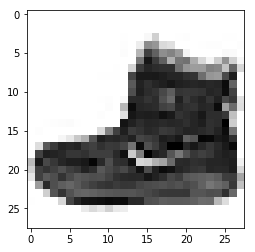

In [7]:
plt.imshow(img0, cmap='Greys', interpolation='none')

I suppose that's an ankle boot...

Typically we use so called one-hot encoding for the class labels in neural networks.  That is instead of having a single value which can have one of 10 label values (e.g. 0, ..., 9), we have 10 values which can each be 1 or 0 depending on if that class is present. 

Then for the output we typically expect something that looks like a probability distribution over these 10 classes, i.e., each neuron has a value between 0 and 1 indicating the probability of that class being present. For example if the tenth (last) neuron is 0.8, then we have 80% probability of the image containing an ankle boot. (The sum over all classes should also be 1.0 in order for it be a probability distribution.)

Here we'll call a utility function to transform the class labels into a one-hot encoding format.

In [8]:
print("Old format", y_train[:5])
y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)
print("One-hot encoding\n", y_train_cat[:5,])

Old format [9 0 0 3 0]
One-hot encoding
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


You can take a look at the output above. For example for the first image, which has label 9, the tenth value is 1, the rest are zero.

Let's display the first example image of each class just for fun.

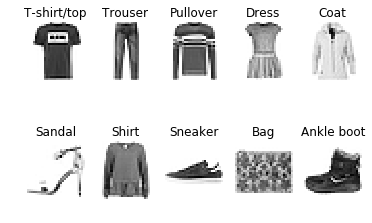

In [9]:
for l in range(10):
    idx = np.argwhere(y_train==l)[0]
  
    plt.subplot(2, 5, l+1)

    img = x_train[idx,:,:].reshape(28,28)

    plt.imshow(img, cmap='Greys', interpolation='none')
    plt.title(labels[l])
    plt.axis('off')

Finally, we normalize the images to be in the range 0.0 to 1.0 instead of 0 to 255.

In [10]:
x_train = x_train/255
x_test = x_test/255

### Create the network

OK, let's create a simple CNN that learns to detect these classes. 

<span style="background-color: yellow">Below you need to fill in the neural network layers</span>, which are (in order):

- One 2D convolutional layer with kernel size 3x3 and 32 output filters/features

- ReLU activation

- Max pooling (2D) of size 2x2

- Fully-connected (dense) layer to 10 output units (for the 10 classes)

- Finally softmax activation to get a probability-like output.

**Hint:** For the first layer you'll need to specify the shape of the input tensor manually by giving this parameter: `input_shape=(28, 28, 1)`.

Before the dense layer we need a `Flatten()` layer. This is a special layer in Keras that transforms the 2D output into 1D. The 2D convolution works with neurons in 2D, but the dense layer works in 1D.

In [11]:
# Initialize model
model = Sequential()

# Add layers here
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(units=10))
model.add(Activation("softmax"))
# Let's use categorical crossentry and sgd optmizer
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


### Training

Now let's train it for 10 epochs. This takes roughly 5 minutes on a CPU.

We use a batch size of 128, which means that the weight updates are calculated for 128 inputs at a time.

In [12]:
%%time

epochs = 10 # one epoch typically takes a minute or two

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 12s - loss: 1.0384 - acc: 0.6646    
Epoch 2/10
60000/60000 [==============================] - 12s - loss: 0.6088 - acc: 0.7872    
Epoch 3/10
60000/60000 [==============================] - 12s - loss: 0.5487 - acc: 0.8053    
Epoch 4/10
60000/60000 [==============================] - 12s - loss: 0.5243 - acc: 0.8132    
Epoch 5/10
60000/60000 [==============================] - 12s - loss: 0.5017 - acc: 0.8233    
Epoch 6/10
60000/60000 [==============================] - 12s - loss: 0.4884 - acc: 0.8277    
Epoch 7/10
60000/60000 [==============================] - 13s - loss: 0.4762 - acc: 0.8321    
Epoch 8/10
60000/60000 [==============================] - 12s - loss: 0.4634 - acc: 0.8374    
Epoch 9/10
60000/60000 [==============================] - 12s - loss: 0.4556 - acc: 0.8389    
Epoch 10/10
60000/60000 [==============================] - 13s - loss: 0.4486 - acc: 0.8438    
CPU times: user 5min 55s, sys: 1min 21s, total: 7

Let's plot how the loss and accuracy have changed over the training time.

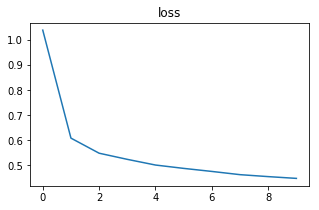

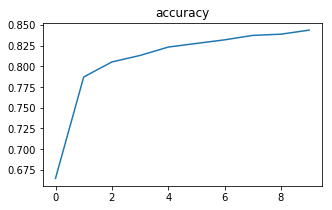

In [13]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')


### Inference

Next, let's how well the model can generalize to data it hasn't seen before, i.e., the test data. Recall from your basic machine learning that this is really the crucial part: it's trivial to learn to perfectly model the training set (you can just memorize each example), the hard part is to learn something general about the classes. So let's try to predict the labels of the test dataset, and compare to the correct labels.

In [14]:
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 83.70%


You should get roughly 84% above if you have done exactly the same steps.  The real result can vary a lot on the random initialisation as we run only 10 epochs here.

### Visualise the weights

An interesting thing is to visualise the learned weights for the convolutional layer.  We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

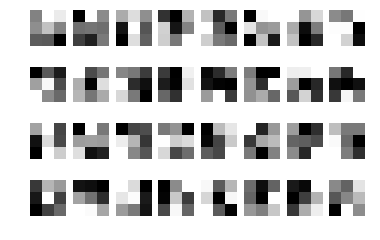

In [15]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems they have learned to detect various corners and edges.

## Exercise 3.2. Make a better CNN (4 points)

Make a network that performs better than the very simple one above. For your convenience we have copied the essential code from the previous exercise to the cells below. If you just did the previous exercise you don't need to rerun the first cell.

<span style="background-color: yellow">Your task is to do at least five (5) reparameterizations for the previous exercise's network and compare the results. At least one of them should have a 5% improvement in the test set result (generalization). Each reparameterization should change a different aspect in the network, while the rest of the parameters are the same as in 3.1. Print out all of the plots and results for each setup into the notebook you return, and analyze and discuss the results briefly in the last cell in the bottom.</span>

You probably need to make a few more cells below, and copy-paste the model code (at least five times).

Example parameters to try to change: 

- number of layers or neurons
- activation functions
- epochs
- batch sizes
- optimizer, see [Keras' documentation on optimizers](https://keras.io/optimizers/)
- max-pooling on/off on certain layers

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [16]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

# Normalize
x_train = x_train/255
x_test = x_test/255

num_classes = 10

y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)

### Variant 1
Change the number of layers and neurons

In [17]:
np.random.seed(123)
model = Sequential()

# Add model here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3)))
model.add(Flatten())
model.add(Dense(256)) #new layer
model.add(Dense(64)) #new layer
model.add(Dense(10))
model.add(Activation("softmax"))

# You can also try different optimizers below
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1982720   
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
__________

In [18]:
%%time

# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 35s - loss: 0.8349 - acc: 0.7073    
Epoch 2/10
60000/60000 [==============================] - 44s - loss: 0.5427 - acc: 0.8026    
Epoch 3/10
60000/60000 [==============================] - 46s - loss: 0.4831 - acc: 0.8284    
Epoch 4/10
60000/60000 [==============================] - 55s - loss: 0.4469 - acc: 0.8434    
Epoch 5/10
60000/60000 [==============================] - 59s - loss: 0.4245 - acc: 0.8505    
Epoch 6/10
60000/60000 [==============================] - 62s - loss: 0.4047 - acc: 0.8578    
Epoch 7/10
60000/60000 [==============================] - 60s - loss: 0.3897 - acc: 0.8636    
Epoch 8/10
60000/60000 [==============================] - 49s - loss: 0.3767 - acc: 0.8689    
Epoch 9/10
60000/60000 [==============================] - 46s - loss: 0.3662 - acc: 0.8728    - ETA: 
Epoch 10/10
60000/60000 [==============================] - 53s - loss: 0.3575 - acc: 0.8756    
CPU times: user 22min 45s, sys: 2min 50s, 

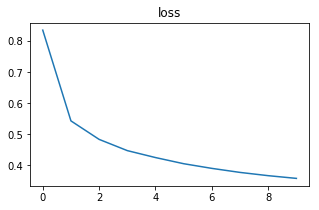

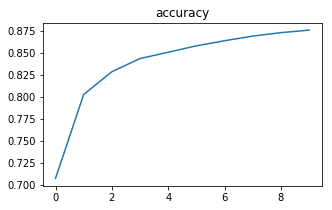

In [19]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [20]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 86.96%


### Variant 2

Change the activation function 

In [21]:
np.random.seed(123)
model = Sequential()

# Add model here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("tanh")) #replace relu with sigmoid
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

# You can also try different optimizers below
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                54090     
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
%%time

# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 14s - loss: 1.0092 - acc: 0.6904    
Epoch 2/10
60000/60000 [==============================] - 20s - loss: 0.5962 - acc: 0.7933    
Epoch 3/10
60000/60000 [==============================] - 19s - loss: 0.5327 - acc: 0.8129    
Epoch 4/10
60000/60000 [==============================] - 15s - loss: 0.4995 - acc: 0.8246    
Epoch 5/10
60000/60000 [==============================] - 17s - loss: 0.4762 - acc: 0.8334    
Epoch 6/10
60000/60000 [==============================] - 14s - loss: 0.4597 - acc: 0.8397    
Epoch 7/10
60000/60000 [==============================] - 18s - loss: 0.4468 - acc: 0.8444    
Epoch 8/10
60000/60000 [==============================] - 15s - loss: 0.4352 - acc: 0.8477    -
Epoch 9/10
60000/60000 [==============================] - 17s - loss: 0.4264 - acc: 0.8507    
Epoch 10/10
60000/60000 [==============================] - 18s - loss: 0.4189 - acc: 0.8536    
CPU times: user 5min 46s, sys: 1min 7s, total: 6

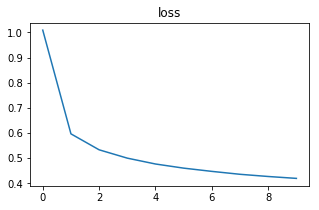

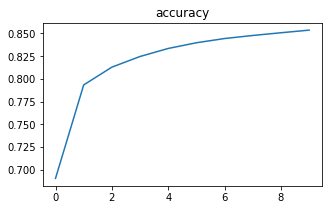

In [23]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [24]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 84.52%


### Variant 3
Change the number of epoch

In [25]:
np.random.seed(123)
model = Sequential()

# Add model here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

# You can also try different optimizers below
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                54090     
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
%%time

# Training
epochs = 40 #run with 40 epochs instead of 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/40
60000/60000 [==============================] - 17s - loss: 1.0394 - acc: 0.6643    
Epoch 2/40
60000/60000 [==============================] - 14s - loss: 0.6091 - acc: 0.7872    
Epoch 3/40
60000/60000 [==============================] - 19s - loss: 0.5488 - acc: 0.8054    
Epoch 4/40
60000/60000 [==============================] - 16s - loss: 0.5241 - acc: 0.8133    
Epoch 5/40
60000/60000 [==============================] - 16s - loss: 0.5014 - acc: 0.8234    
Epoch 6/40
60000/60000 [==============================] - 18s - loss: 0.4879 - acc: 0.8278    
Epoch 7/40
60000/60000 [==============================] - 20s - loss: 0.4755 - acc: 0.8326    
Epoch 8/40
60000/60000 [==============================] - 19s - loss: 0.4625 - acc: 0.8381    
Epoch 9/40
60000/60000 [==============================] - 18s - loss: 0.4545 - acc: 0.8397    
Epoch 10/40
60000/60000 [==============================] - 16s - loss: 0.4471 - acc: 0.8441    
Epoch 11/40
60000/60000 [========================

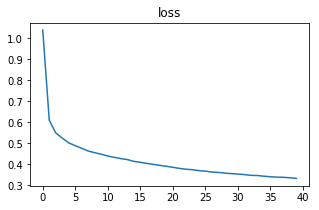

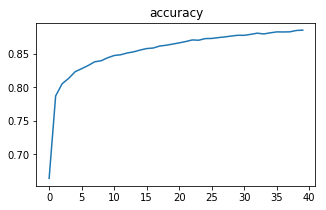

In [27]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [28]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 87.21%


### Variant 4
Change the batch size

In [29]:
np.random.seed(123)
model = Sequential()

# Add model here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

# You can also try different optimizers below
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                54090     
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
%%time

# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=256, #use 256 as batch size instead of 128
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 12s - loss: 1.3449 - acc: 0.5825    
Epoch 2/10
60000/60000 [==============================] - 11s - loss: 0.7259 - acc: 0.7533    
Epoch 3/10
60000/60000 [==============================] - 11s - loss: 0.6245 - acc: 0.7859    
Epoch 4/10
60000/60000 [==============================] - 11s - loss: 0.5778 - acc: 0.7984    
Epoch 5/10
60000/60000 [==============================] - 11s - loss: 0.5491 - acc: 0.8083    
Epoch 6/10
60000/60000 [==============================] - 11s - loss: 0.5306 - acc: 0.8143    
Epoch 7/10
60000/60000 [==============================] - 11s - loss: 0.5175 - acc: 0.8166    
Epoch 8/10
60000/60000 [==============================] - 11s - loss: 0.5042 - acc: 0.8222    
Epoch 9/10
60000/60000 [==============================] - 11s - loss: 0.4951 - acc: 0.8254    
Epoch 10/10
60000/60000 [==============================] - 10s - loss: 0.4878 - acc: 0.8279    
CPU times: user 5min 56s, sys: 1min, total: 6min 

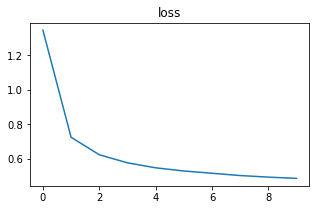

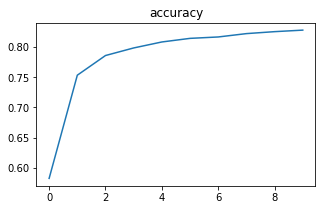

In [31]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [32]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 82.10%


### Variant 5
Change the type of optimizer

In [33]:
np.random.seed(123)
model = Sequential()

# Add model here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

# You can also try different optimizers below
model.compile(loss='categorical_crossentropy', 
              optimizer="adam", #use adam instead of sgd 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                54090     
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
%%time
# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 12s - loss: 0.5324 - acc: 0.8169    
Epoch 2/10
60000/60000 [==============================] - 11s - loss: 0.3539 - acc: 0.8779    
Epoch 3/10
60000/60000 [==============================] - 13s - loss: 0.3162 - acc: 0.8894    
Epoch 4/10
60000/60000 [==============================] - 13s - loss: 0.2943 - acc: 0.8971    
Epoch 5/10
60000/60000 [==============================] - 12s - loss: 0.2760 - acc: 0.9030    
Epoch 6/10
60000/60000 [==============================] - 13s - loss: 0.2646 - acc: 0.9060    
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.2537 - acc: 0.9099    
Epoch 8/10
60000/60000 [==============================] - 12s - loss: 0.2436 - acc: 0.9136    
Epoch 9/10
60000/60000 [==============================] - 13s - loss: 0.2370 - acc: 0.9155    
Epoch 10/10
60000/60000 [==============================] - 14s - loss: 0.2287 - acc: 0.9187    
CPU times: user 6min 5s, sys: 1min 21s, total: 7m

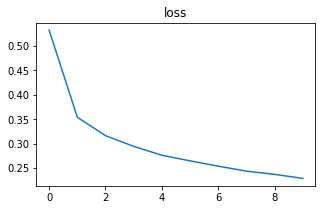

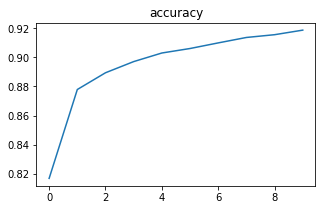

In [35]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [36]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 89.80%


### Fully-changed Variant
I changed only one aspect of the network in the previous 5 variants. And the variant with "adam" has already met what is requested. In this variant, I would like to change more than one aspect.

In [37]:
np.random.seed(123)
model = Sequential()

# Add model here
model.add(Conv2D(32,(3, 3), input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(10,activation="softmax"))

# You can also try different optimizers below
model.compile(loss='categorical_crossentropy', 
              optimizer="adam", 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2359552   
__________

In [38]:
%%time

# Training
epochs = 25

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/25
60000/60000 [==============================] - 125s - loss: 0.4068 - acc: 0.8556   
Epoch 2/25
60000/60000 [==============================] - 131s - loss: 0.2551 - acc: 0.9080   
Epoch 3/25
60000/60000 [==============================] - 144s - loss: 0.2074 - acc: 0.9242   
Epoch 4/25
60000/60000 [==============================] - 127s - loss: 0.1775 - acc: 0.9341   
Epoch 5/25
60000/60000 [==============================] - 136s - loss: 0.1528 - acc: 0.9446   
Epoch 6/25
60000/60000 [==============================] - 123s - loss: 0.1342 - acc: 0.9510   
Epoch 7/25
60000/60000 [==============================] - 131s - loss: 0.1159 - acc: 0.9566   
Epoch 8/25
60000/60000 [==============================] - 131s - loss: 0.1003 - acc: 0.9624   
Epoch 9/25
60000/60000 [==============================] - 175s - loss: 0.0941 - acc: 0.9653   
Epoch 10/25
60000/60000 [==============================] - 169s - loss: 0.0815 - acc: 0.9699   
Epoch 11/25
60000/60000 [========================

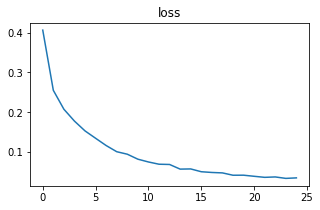

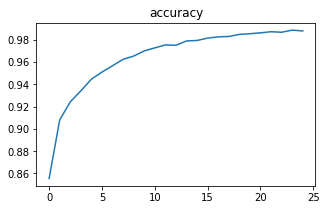

In [39]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [40]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 93.15%


### Discussion

I have only changed one aspect of the network in the first five variants, while almost everything has been changed in the last one. One of the first 5 variants, the one with optimizer changed, has met the requirement, which is to have a 5% improvement. All the accuracy is listed below:

|Variant|Accuracy|
|---|---|
|Original|83.7%|
|Number of Layers and Neurons|86.9%|
|Activation|84.5%|
|Number of Epochs|87.2%|
|Batch Size|82.1%|
|Optimizer|89.8%|
|Fully-changed|93.2%|


If we refer to that only one aspect of the original network is changed, most of the accuracy of the first 5 variants are better than the accuracy of the original one. As what is illustrated in the 1st variant, a network with more complicated structure may be better than a simpler one, but it is also rather noticeable that the complicated one will surely take more time to train. For the 2nd variant, it has a small improvement. But it is not as good as others. So, in practice, it is quite reasonable that we need to adjust almost every aspect of the network to achieve a better result. For the 3rd variant, the fact that the variant with more epochs will have a higher accuracy is quite obvious since weights are more close to optima if compared to the original one. For the 4th variant, the result actually is worse than the original one. I have tried with different values, such as 64, 256,512 and 1024. None of them can lead to a better result. I suppose more trials are needed. For the 5th variant, it seems that "adam" optimizer outperform the "sgd" optimizer. Overall, we can see that the accuracy can be improved by adjusting the parameter of different aspects. However, it seems to be difficult to achieve over 90% accuracy with only one aspect changeable.

To achieve a better accuracy, I have changed the almost everything of the network in the last variant. Additionally, I use Dropout layer and BatchNormalization layer to improve the overall accuracy and speed up the computation. As what has shown in the first 5 variants, I increase the number of epochs and change the optimizer to "adam" as well. However, because of the complicated topological structures and the number of epochs, this variant took significantly  longer time than others.